<a href="https://www.kaggle.com/code/yutodennou/preprocessing-draw-heatmap?scriptVersionId=182586840" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a id="1"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34); background-color:rgb(255,255,255); "> <b> 1. Processing👉</b></div>


In [1]:
import scipy
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import matplotlib.pylab as plt
from collections import defaultdict

In [2]:
df = pd.read_csv('/kaggle/input/worlds-best-universities-qs-rankings-2025/qs-world-rankings-2025.csv')
df.head()

,2025 Rank,2024 Rank,Institution Name,Location,Location Full,Size,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,International Research Network,Employment Outcomes,Sustainability,QS Overall Score
0,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0,100
1,2,6,Imperial College London,UK,United Kingdom,L,98.5,99.5,98.2,93.9,100.0,99.6,97.4,93.4,99.7,98.5
2,3,3,University of Oxford,UK,United Kingdom,L,100.0,100.0,100.0,84.8,98.1,97.7,100.0,100.0,85.0,96.9
3,4,4,Harvard University,US,United States,L,100.0,100.0,96.3,100.0,74.1,69.0,99.6,100.0,84.4,96.8
4,5,2,University of Cambridge,UK,United Kingdom,L,100.0,100.0,100.0,84.6,100.0,94.8,99.3,100.0,84.8,96.7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   2025 Rank                       1503 non-null   object 
 1   2024 Rank                       1482 non-null   object 
 2   Institution Name                1503 non-null   object 
 3   Location                        1503 non-null   object 
 4   Location Full                   1503 non-null   object 
 5   Size                            1503 non-null   object 
 6   Academic Reputation             1503 non-null   float64
 7   Employer Reputation             1503 non-null   float64
 8   Faculty Student                 1503 non-null   float64
 9   Citations per Faculty           1503 non-null   float64
 10  International Faculty           1403 non-null   float64
 11  International Students          1445 non-null   float64
 12  International Research Network  15

In [4]:
def split_rank(X):
    if type(X) == str:
        if '-' in X:
            X = X.split('-')[0]
        if '+' in X:    
            X = X.split('+')[0]
    return X

In [5]:
df['2025 Rank'] = df['2025 Rank'].apply(split_rank)
df['2025 Rank'] = df['2025 Rank'].astype(int)
df = df.fillna({'2024 Rank': '0'})
df['2024 Rank'] = df['2024 Rank'].apply(split_rank)
df['2024 Rank'] = df['2024 Rank'].astype(int)
df.loc[df['QS Overall Score']=='-',:] = 0.0

In [6]:
df['QS Overall Score']

0        100
1       98.5
2       96.9
3       96.8
4       96.7
        ... 
1498     0.0
1499     0.0
1500     0.0
1501     0.0
1502     0.0
Name: QS Overall Score, Length: 1503, dtype: object

In [7]:
tmp = df[[
    '2025 Rank',
    '2024 Rank',
    'Academic Reputation',
    'Employer Reputation',
    'Faculty Student',
    'Citations per Faculty',
    'International Faculty',
    'International Students',
    'International Research Network',
    'Employment Outcomes',
    'Sustainability',
    'QS Overall Score']]

In [8]:
tmp['QS Overall Score'] = tmp['QS Overall Score'].astype('float64')

/tmp/ipykernel_18/3602314947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['QS Overall Score'] = tmp['QS Overall Score'].astype('float64')


In [9]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   2025 Rank                       1503 non-null   int64  
 1   2024 Rank                       1503 non-null   int64  
 2   Academic Reputation             1503 non-null   float64
 3   Employer Reputation             1503 non-null   float64
 4   Faculty Student                 1503 non-null   float64
 5   Citations per Faculty           1503 non-null   float64
 6   International Faculty           1496 non-null   float64
 7   International Students          1501 non-null   float64
 8   International Research Network  1503 non-null   float64
 9   Employment Outcomes             1503 non-null   float64
 10  Sustainability                  1503 non-null   float64
 11  QS Overall Score                1503 non-null   float64
dtypes: float64(10), int64(2)
memory us

In [10]:
tmp = tmp.corr('spearman')

<Axes: >

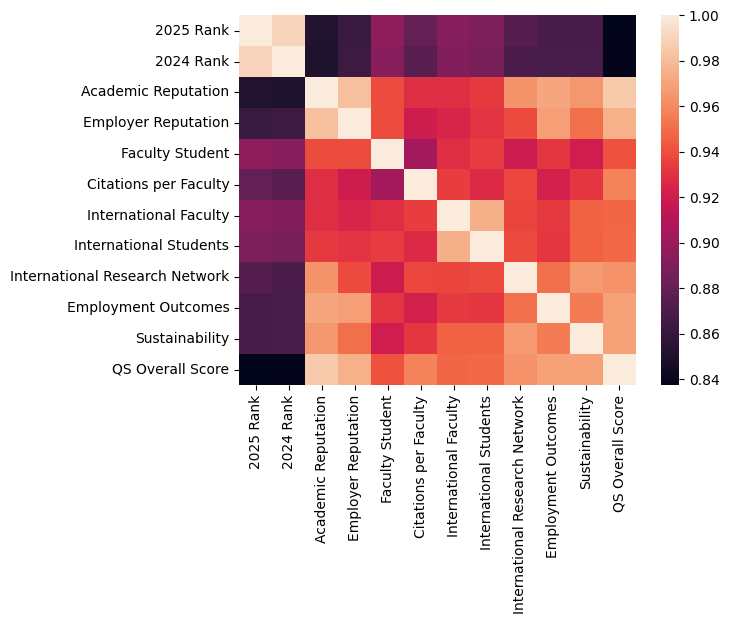

In [11]:
sns.heatmap(
    tmp
)